In [1]:
from PYmodule import *
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
f_seed = 0.01
f_seedlabel = 'f%d'%abs(int(np.log10(f_seed)))
prex = '../4p/M0r8_' + f_seedlabel + 'lin' # on sk1
# prex = '../M0r8_' + f_seedlabel + 'lin' # local

Mmin = 1e9
outMprex = prex +'Mmin%d'%(int(np.log10(Mmin)))
Lmax = -26
outLprex = prex +'Lmax%d'%abs(int(Lmax))
outMprex
import matplotlib.patheffects as pe


In [3]:
styles = ['-','--','-.','.']
colors = ['blue','red','orange']
marks = ['o','v','P','D','p','x','s']
markcs = ['b','g','c','m','y']
markcs = ['grey']*10
survey_name_list = ['Roman wide','Euclid wide']

# N_detect only

In [4]:
# whole sky volume
z=9
Vc_cover = Vc(4e4,z,1)
print('Vcomoving=%.1e Mpc3'%Vc_cover)

Vcomoving=2.7e+11 Mpc3


In [5]:
N_detect = {'Roman wide':[], 'Euclid wide':[]}
N_plus = {'Roman wide':[], 'Euclid wide':[]}
N_minus = {'Roman wide':[], 'Euclid wide':[]}

for z in np.arange(6,11):
    fLname = prex+'QLFz{:d}'.format(z)
    TL = ascii.read(fLname, guess=False, delimiter=' ')
    # QLF
    y_best, med, spread = TL['y_best']/1e9, TL['med']/1e9, TL['spread']/1e9
    y_no_obsc = y_best * corr_U14D20(M1450)


    # add detection limit
    for iname in range(len(survey_name_list)):
        survey_name = survey_name_list[iname]
        deep_mag = M_absolute(Depth[survey_name],z)
        Vc_cover = Vc(Area[survey_name],z,1)
        N_detect[survey_name].append(np.nansum(y_best[TL['M1450']<deep_mag]*dmag*Vc_cover))
        N_plus[survey_name].append(np.nansum((med+spread-y_best)[TL['M1450']<deep_mag]*dmag*Vc_cover))
        N_minus[survey_name].append(np.nansum((y_best-med+spread)[TL['M1450']<deep_mag]*dmag*Vc_cover))


for survey_name in survey_name_list:
    print(survey_name)
    for i in range(len(N_detect[survey_name])):
        print('{:.0f} +{:.0f} -{:.0f}'.format(round(N_detect[survey_name][i]),round(N_plus[survey_name][i]),round(N_minus[survey_name][i])))


Roman wide
6759 +15 -3185
1514 +169 -558
349 +53 -131
85 +23 -48
25 +12 -15
Euclid wide
6654 +95 -2282
708 +213 -237
93 +66 -56
14 +32 -27
3 +12 -11


# z=7

Bouwens
Harikane


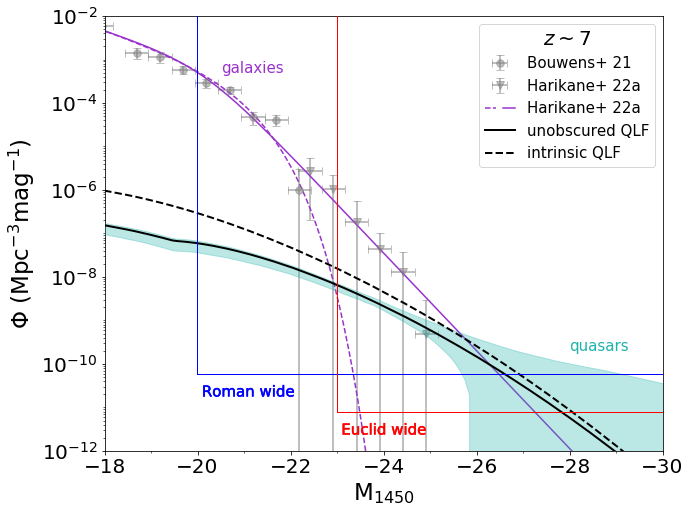

In [6]:
z = 7

obslabels = ['Bouwens','Harikane'] 

figl, axl = plt.subplots(figsize=(10, 8))
fLname = prex+'QLFz{:d}'.format(z)
TL = ascii.read(fLname, guess=False, delimiter=' ')
# QLF
y_best, med, spread = TL['y_best']/1e9, TL['med']/1e9, TL['spread']/1e9
y_no_obsc = y_best * corr_U14D20(M1450)
pqlf1,=axl.plot(TL['M1450'], y_best, linewidth=lw,color='k', label='unobscured QLF',zorder=3)
pqlf2,=axl.plot(TL['M1450'], y_no_obsc, '--',linewidth=lw,color='k', label='intrinsic QLF',zorder=3)
axl.fill_between(TL['M1450'],med-spread,med+spread,color='lightseagreen',alpha=0.3,zorder=3)
axl.text(-28, 2e-10, 'quasars',
         fontsize=15,color='lightseagreen',zorder=4)

# GLF & data
pglf1,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='Schechter')/1e9,'--',c='darkorchid',label='Harikane+ 22a')
pglf2,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='DPL')/1e9,c='darkorchid',label='Harikane+ 22a')

obslabel = 'Bouwens'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z-7_LF_data/z7_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata1=axl.errorbar(T_data['M_uv'], T_data['Phi'], xerr = T_data['dmag']/2,alpha=.5,yerr = T_data['dPhi'],
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4,label='Bouwens+ 21')
obslabel = 'Harikane'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z-7_LF_data/z7_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata2=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
             alpha=.5,yerr = (T_data['Phi_-']*1e-6,T_data['Phi_+']*1e-6),
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4,label='Harikane+ 22a')
axl.text(-20.5, 5e-4, 'galaxies',
         fontsize=15,color='darkorchid',zorder=4)

# add detection limit
for iname in range(len(survey_name_list)):
    survey_name = survey_name_list[iname]
    deep_mag = M_absolute(Depth[survey_name],z)
    Vc_cover = Vc(Area[survey_name],z,1)
    detection = [np.linspace(-40,deep_mag,num=50),np.linspace(1./Vc_cover,1e10,num=50)]
    # horizontal
    axl.plot(detection[0],1./Vc_cover*np.ones(50),styles[0],linewidth=1,color=colors[iname],zorder=4)
    # vertical
    axl.plot(deep_mag*np.ones(50),detection[1],styles[0],linewidth=1,color=colors[iname],zorder=4)

    axl.text(deep_mag-.1, .3/Vc_cover, survey_name,
#              backgroundcolor = 'white',
             color=colors[iname],
             path_effects=[pe.withStroke(linewidth=.5, foreground=colors[iname])],
             fontsize=15,zorder=4)


xleft = -18; xright = -30
axl.set_xlim(xleft,xright)
logybottom = -12; logytop = -2
axl.set_ylim(10**logybottom,10**logytop)

axl.set_yscale('log')

## set y ticks
y_major = matplotlib.ticker.LogLocator(base = 100.0, numticks = logytop-logybottom+1)
axl.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 100)
axl.yaxis.set_minor_locator(y_minor)
axl.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## set x ticks
axl.xaxis.set_major_locator(MultipleLocator(2))
axl.xaxis.set_minor_locator(MultipleLocator(1))


axl.set_xlabel(r'$\mathrm{M_{1450}}$',fontsize=fslabel)
axl.set_ylabel(r'$\mathrm{\Phi~(Mpc^{-3}mag^{-1})}$',fontsize=fslabel)


legend = axl.legend([pdata1,pdata2,(pglf1,pglf2),pqlf1,pqlf2],
                    ['Bouwens+ 21','Harikane+ 22a','Harikane+ 22a','unobscured QLF','intrinsic QLF'],
                    numpoints=1,
                    fontsize=15,
                    handler_map={tuple:HandlerTuple(ndivide=None,pad=.5,xpad=0,ypad=.7,update_func ='update_prop')},
#                            handler_map={tuple: HandlerTuple(ndivide=1,pad=.5,xpad=0,ypad=.7)},
                    loc='upper right',
                    title=r'$z\sim {:d}$'.format(z))
legend.get_title().set_fontsize(fslegend)

axl.tick_params(labelsize=fstick)

figl.savefig(figpre+'LF_spreadz%d.pdf'%z,dpi=300,bbox_inches='tight')



# z=8

Donnan
Bouwens
McLure
Bowler
Stefanon


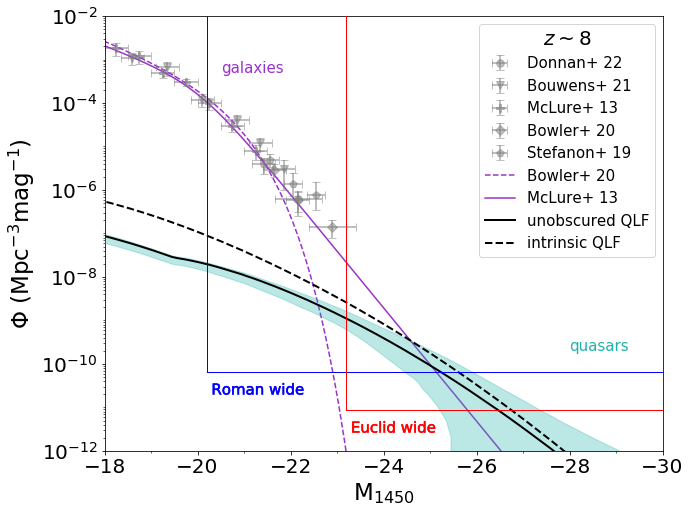

In [7]:
z = 8

obslabels = ['Donnan','Bouwens','McLure','Bowler','Stefanon'] 

figl, axl = plt.subplots(figsize=(10, 8))
fLname = prex+'QLFz{:d}'.format(z)
TL = ascii.read(fLname, guess=False, delimiter=' ')

# QLF
y_best, med, spread = TL['y_best']/1e9, TL['med']/1e9, TL['spread']/1e9
y_no_obsc = y_best * corr_U14D20(M1450)
pqlf1,=axl.plot(TL['M1450'], y_best, linewidth=lw,color='k', label='unobscured QLF',zorder=3)
pqlf2,=axl.plot(TL['M1450'], y_no_obsc, '--',linewidth=lw,color='k', label='intrinsic QLF',zorder=3)
axl.fill_between(TL['M1450'],med-spread,med+spread,color='lightseagreen',alpha=0.3,zorder=3)
axl.text(-28, 2e-10, 'quasars',
         fontsize=15,color='lightseagreen',zorder=4)

# GLF & data
pglf1,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='Schechter')/1e9,'--',c='darkorchid',label='Bowler+ 20')
pglf2,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='DPL')/1e9,c='darkorchid',label='McLure+ 13')
                    

obslabel = 'Donnan'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_8_LF_data/z8_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata1=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
                    alpha=.5,yerr = T_data['dPhi']*1e-6,label='Donnan+ 22',
                    fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'Bouwens'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_8_LF_data/z8_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata2=axl.errorbar(T_data['M_uv'], T_data['Phi'], xerr = T_data['dmag']/2,
                    alpha=.5,yerr = T_data['dPhi'],label='Bouwens+ 21',
                    fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'McLure'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_8_LF_data/z8_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata3=axl.errorbar(T_data['M_uv'], T_data['Phi'], xerr = T_data['dmag']/2,
                    alpha=.5,yerr = T_data['dPhi'],label='McLure+ 13',
                    fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'Bowler'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_8_LF_data/z8_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata4=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
                    alpha=.5,yerr = T_data['dPhi']*1e-6,label='Bowler+ 20',
                    fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'Stefanon'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_8_LF_data/z8_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata5=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
                    alpha=.5,yerr = (T_data['Phi_-']*1e-6,T_data['Phi_+']*1e-6),label='Stefanon+ 19',
                    fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
axl.text(-20.5, 5e-4, 'galaxies',
         fontsize=15,color='darkorchid',zorder=4)

# add detection limit
for iname in range(len(survey_name_list)):
    survey_name = survey_name_list[iname]
    deep_mag = M_absolute(Depth[survey_name],z)
    Vc_cover = Vc(Area[survey_name],z,1)
    detection = [np.linspace(-40,deep_mag,num=50),np.linspace(1./Vc_cover,1e10,num=50)]
    # horizontal
    axl.plot(detection[0],1./Vc_cover*np.ones(50),styles[0],linewidth=1,color=colors[iname],zorder=4)
    # vertical
    axl.plot(deep_mag*np.ones(50),detection[1],styles[0],linewidth=1,color=colors[iname],zorder=4)
    
    axl.text(deep_mag-.1, .3/Vc_cover, survey_name,
#              backgroundcolor = 'white',
             color=colors[iname],
             path_effects=[pe.withStroke(linewidth=.5, foreground=colors[iname])],
             fontsize=15,zorder=4)



xleft = -18; xright = -30
axl.set_xlim(xleft,xright)
logybottom = -12; logytop = -2
axl.set_ylim(10**logybottom,10**logytop)

axl.set_yscale('log')

## set y ticks
y_major = matplotlib.ticker.LogLocator(base = 100.0, numticks = logytop-logybottom+1)
axl.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 100)
axl.yaxis.set_minor_locator(y_minor)
axl.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## set x ticks
axl.xaxis.set_major_locator(MultipleLocator(2))
axl.xaxis.set_minor_locator(MultipleLocator(1))


axl.set_xlabel(r'$\mathrm{M_{1450}}$',fontsize=fslabel)
axl.set_ylabel(r'$\mathrm{\Phi~(Mpc^{-3}mag^{-1})}$',fontsize=fslabel)

legend = axl.legend([pdata1,pdata2,pdata3,pdata4,pdata5,pglf1,pglf2,pqlf1,pqlf2],
                    ['Donnan+ 22','Bouwens+ 21','McLure+ 13','Bowler+ 20','Stefanon+ 19','Bowler+ 20','McLure+ 13','unobscured QLF','intrinsic QLF'],
                    numpoints=1,
                    fontsize=15,
                    handler_map={tuple:HandlerTuple(ndivide=None,pad=.5,xpad=0,ypad=.7,update_func ='update_prop')},
                    loc='upper right',
                    title=r'$z\sim {:d}$'.format(z))


legend.get_title().set_fontsize(fslegend)

axl.tick_params(labelsize=fstick)

figl.savefig(figpre+'LF_spreadz%d.pdf'%z,dpi=300,bbox_inches='tight')



# z=9

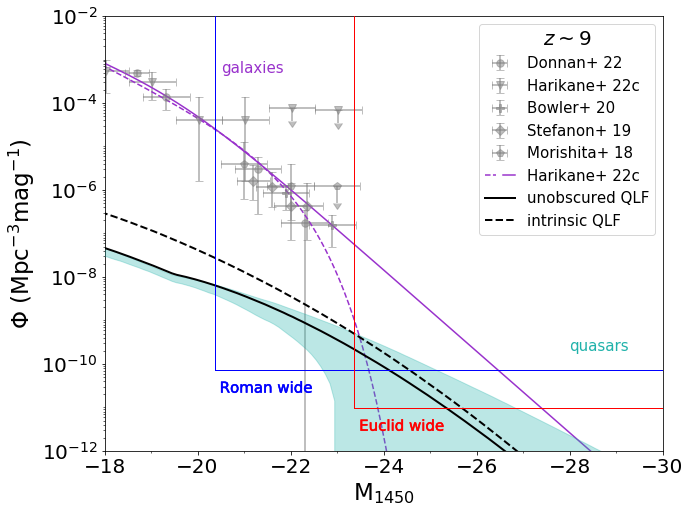

In [8]:
z = 9

obslabels = ['Donnan','Harikane','Bowler','Stefanon','Morishita']

figl, axl = plt.subplots(figsize=(10, 8))
fLname = prex+'QLFz{:d}'.format(z)
TL = ascii.read(fLname, guess=False, delimiter=' ')

# QLF
y_best, med, spread = TL['y_best']/1e9, TL['med']/1e9, TL['spread']/1e9
y_no_obsc = y_best * corr_U14D20(M1450)
pqlf1,=axl.plot(TL['M1450'], y_best, linewidth=lw,color='k', label='unobscured QLF',zorder=3)
pqlf2,=axl.plot(TL['M1450'], y_no_obsc, '--',linewidth=lw,color='k', label='intrinsic QLF',zorder=3)
axl.fill_between(TL['M1450'],med-spread,med+spread,color='lightseagreen',alpha=0.3,zorder=3)
axl.text(-28, 2e-10, 'quasars',
         fontsize=15,color='lightseagreen',zorder=4)

# GLF & data
pglf1,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='Schechter')/1e9,'--',c='darkorchid',label='Harikane+ 22c')
pglf2,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='DPL')/1e9,c='darkorchid',label='Harikane+ 22c')

obslabels = ['Donnan','Harikane','Bowler','Stefanon','Morishita']

obslabel = 'Donnan'; iobs = obslabels.index(obslabel)
T_data = ascii.read('../z_9_LF_data/z9_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata1=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
             alpha=.5,yerr = T_data['dPhi']*1e-6,label='Donnan+ 22',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'Harikane'; iobs = obslabels.index(obslabel)
T_data = ascii.read('../z_9_LF_data/z9_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata2=axl.errorbar(T_data['M_uv'][2:], T_data['Phi'][2:]*1e-5, xerr = T_data['dmag'][2:]/2,
             alpha=.5,yerr = (T_data['dPhi_-'][2:]*1e-5,T_data['dPhi_+'][2:]*1e-5),label='Harikane+ 22c',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
# plot upper limits only 
uplims = np.array([1, 1], dtype=bool)
p=axl.errorbar(T_data['M_uv'][:2], T_data['Phi'][:2]*1e-5, xerr = T_data['dmag'][:2]/2,
             alpha=.5,
             yerr = T_data['Phi'][:2]*5e-6,
             uplims=uplims,
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)

obslabel = 'Bowler'; iobs = obslabels.index(obslabel)
T_data = ascii.read('../z_9_LF_data/z9_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata3=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
             alpha=.5,yerr = T_data['dPhi']*1e-6,label='Bowler+ 20',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'Stefanon'; iobs = obslabels.index(obslabel)
T_data = ascii.read('../z_9_LF_data/z9_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata4=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag'],
             alpha=.5,yerr = (T_data['Phi_-']*1e-6,T_data['Phi_+']*1e-6),label='Stefanon+ 19',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'Morishita'; iobs = obslabels.index(obslabel)
T_data = ascii.read('../z_9_LF_data/z9_'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata5=axl.errorbar(T_data['M_uv'][1:], pow(10,T_data['logPhi'][1:]), xerr = T_data['dmag'][1:]/2,
             alpha=.5,
             yerr = ( pow(10,T_data['logPhi'][1:])-pow(10,T_data['logPhi'][1:]-T_data['logPhi_-'][1:]),
             pow(10,T_data['logPhi'][1:]+T_data['logPhi_+'][1:])-pow(10,T_data['logPhi'][1:]) ),
             label='Morishita+ 18',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
p=axl.errorbar(T_data['M_uv'][0], pow(10,T_data['logPhi'][0]), xerr = T_data['dmag'][0]/2,
             alpha=.5,
             yerr = pow(10,T_data['logPhi'][0])*.6,
             uplims=True,
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)

axl.text(-20.5, 5e-4, 'galaxies',
         fontsize=15,color='darkorchid',zorder=4)

# add detection limit
for iname in range(len(survey_name_list)):
    survey_name = survey_name_list[iname]
    deep_mag = M_absolute(Depth[survey_name],z)
    Vc_cover = Vc(Area[survey_name],z,1)
    detection = [np.linspace(-40,deep_mag,num=50),np.linspace(1./Vc_cover,1e10,num=50)]
    # horizontal
    axl.plot(detection[0],1./Vc_cover*np.ones(50),styles[0],linewidth=1,color=colors[iname],zorder=4)
    # vertical
    axl.plot(deep_mag*np.ones(50),detection[1],styles[0],linewidth=1,color=colors[iname],zorder=4)
    
    axl.text(deep_mag-.1, .3/Vc_cover, survey_name,
#              backgroundcolor = 'white',
             color=colors[iname],
             path_effects=[pe.withStroke(linewidth=.5, foreground=colors[iname])],
             fontsize=15,zorder=4)



xleft = -18; xright = -30
axl.set_xlim(xleft,xright)
logybottom = -12; logytop = -2
axl.set_ylim(10**logybottom,10**logytop)

axl.set_yscale('log')

## set y ticks
y_major = matplotlib.ticker.LogLocator(base = 100.0, numticks = logytop-logybottom+1)
axl.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 100)
axl.yaxis.set_minor_locator(y_minor)
axl.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## set x ticks
axl.xaxis.set_major_locator(MultipleLocator(2))
axl.xaxis.set_minor_locator(MultipleLocator(1))


axl.set_xlabel(r'$\mathrm{M_{1450}}$',fontsize=fslabel)
axl.set_ylabel(r'$\mathrm{\Phi~(Mpc^{-3}mag^{-1})}$',fontsize=fslabel)

legend = axl.legend([pdata1,pdata2,pdata3,pdata4,pdata5,(pglf1,pglf2),pqlf1,pqlf2],
                    ['Donnan+ 22','Harikane+ 22c','Bowler+ 20','Stefanon+ 19','Morishita+ 18','Harikane+ 22c','unobscured QLF','intrinsic QLF'],
                    numpoints=1,
                    fontsize=15,
                    handler_map={tuple:HandlerTuple(ndivide=None,pad=.5,xpad=0,ypad=.7,update_func ='update_prop')},
                    loc='upper right',
                    title=r'$z\sim {:d}$'.format(z))


legend.get_title().set_fontsize(fslegend)

axl.tick_params(labelsize=fstick)

figl.savefig(figpre+'LF_spreadz%d.pdf'%z,dpi=300,bbox_inches='tight')



# z=10$\sim$13

z10-12_Donnan
z10-12_Harikane
z13_Harikane
z13_Naidu
z10_Morishita
z11_GN-z11


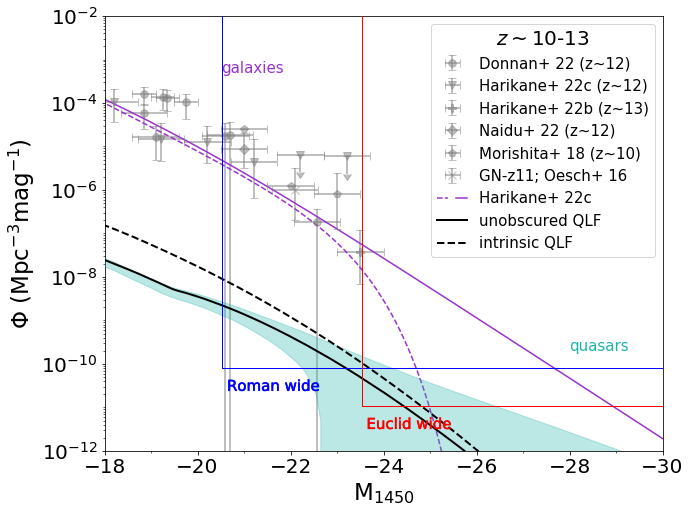

In [9]:
z = 10

obslabels = ['z10-12_Donnan','z10-12_Harikane','z13_Harikane','z13_Naidu','z10_Morishita','z11_GN-z11']

figl, axl = plt.subplots(figsize=(10, 8))
fLname = prex+'QLFz{:d}'.format(z)
TL = ascii.read(fLname, guess=False, delimiter=' ')

# QLF
y_best, med, spread = TL['y_best']/1e9, TL['med']/1e9, TL['spread']/1e9
y_no_obsc = y_best * corr_U14D20(M1450)
pqlf1,=axl.plot(TL['M1450'], y_best, linewidth=lw,color='k', label='unobscured QLF',zorder=3)
pqlf2,=axl.plot(TL['M1450'], y_no_obsc, '--',linewidth=lw,color='k', label='intrinsic QLF',zorder=3)
axl.fill_between(TL['M1450'],med-spread,med+spread,color='lightseagreen',alpha=0.3,zorder=3)
axl.text(-28, 2e-10, 'quasars',
         fontsize=15,color='lightseagreen',zorder=4)

# GLF & data
pglf1,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='Schechter')/1e9,'--',c='darkorchid',label='Harikane+ 22c')
pglf2,=axl.plot(TL['M1450'],LF_Gal(TL['M1450'],z, mod='DPL')/1e9,c='darkorchid',label='Harikane+ 22c')

obslabel = 'z10-12_Donnan'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_10-13_LF_data/'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata1=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
             alpha=.5,yerr = T_data['dPhi']*1e-6,
             label='Donnan+ 22 (z~12)',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'z10-12_Harikane'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_10-13_LF_data/'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata2=axl.errorbar(T_data['M_uv'][2:], T_data['Phi'][2:]*1e-5, xerr = T_data['dmag'][2:]/2,
             alpha=.5,yerr = (T_data['Phi_-'][2:]*1e-5,T_data['Phi_+'][2:]*1e-5),
             label='Harikane+ 22c (z~12)',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
p=axl.errorbar(T_data['M_uv'][:2], T_data['Phi'][:2]*1e-5, xerr = T_data['dmag'][:2]/2,
             alpha=.5,yerr = T_data['Phi'][:2]*1e-5*.6,
             uplims=[True,True],
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)

obslabel = 'z13_Harikane'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_10-13_LF_data/'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata3=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-8, xerr = T_data['dmag']/2,
             alpha=.5,yerr = (T_data['Phi_-']*1e-8,T_data['Phi_+']*1e-8),
             label='Harikane+ 22b (z~13)',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'z13_Naidu'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_10-13_LF_data/'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata4=axl.errorbar(T_data['M_uv'], pow(10,T_data['logPhi']), xerr = T_data['dmag']/2,
             alpha=.5,yerr = ( pow(10,T_data['logPhi'])-pow(10,T_data['logPhi']-T_data['dPhi_-']),
             pow(10,T_data['logPhi']+T_data['dPhi_+'])-pow(10,T_data['logPhi']) ),
             label='Naidu+ 22 (z~12)',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
# 2 points upper limits only; but not shown, too messy
obslabel = 'z10_Morishita'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_10-13_LF_data/'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata5=axl.errorbar(T_data['M_uv'], pow(10,T_data['logPhi']), xerr = T_data['dmag']/2,
             alpha=.5,
             label='Morishita+ 18 (z~10)',
             yerr = ( pow(10,T_data['logPhi'])-pow(10,T_data['logPhi']-T_data['logPhi_-']),
             pow(10,T_data['logPhi']+T_data['logPhi_+']) - pow(10,T_data['logPhi']) ),
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)
obslabel = 'z11_GN-z11'; iobs = obslabels.index(obslabel); print(obslabel)
T_data = ascii.read('../z_10-13_LF_data/'+obslabel+'.dat',guess=False,delimiter=' ',)
pdata6=axl.errorbar(T_data['M_uv'], T_data['Phi']*1e-6, xerr = T_data['dmag']/2,
             alpha=.5,yerr = (T_data['Phi_-']*1e-6,T_data['Phi_+']*1e-6),
             label='GN-z11; Oesch+ 16',
             fmt=marks[iobs],ms=7.5,color=markcs[iobs],elinewidth=2,capsize=4)


axl.text(-20.5, 5e-4, 'galaxies',
         fontsize=15,color='darkorchid',zorder=4)

# add detection limit
for iname in range(len(survey_name_list)):
    survey_name = survey_name_list[iname]
    deep_mag = M_absolute(Depth[survey_name],z)
    Vc_cover = Vc(Area[survey_name],z,1)
    detection = [np.linspace(-40,deep_mag,num=50),np.linspace(1./Vc_cover,1e10,num=50)]
    # horizontal
    axl.plot(detection[0],1./Vc_cover*np.ones(50),styles[0],linewidth=1,color=colors[iname],zorder=4)
    # vertical
    axl.plot(deep_mag*np.ones(50),detection[1],styles[0],linewidth=1,color=colors[iname],zorder=4)
    

    axl.text(deep_mag-.1, .3/Vc_cover, survey_name,
#              backgroundcolor = 'white',
             color=colors[iname],
             path_effects=[pe.withStroke(linewidth=.5, foreground=colors[iname])],
             fontsize=15,zorder=4)



xleft = -18; xright = -30
axl.set_xlim(xleft,xright)
logybottom = -12; logytop = -2
axl.set_ylim(10**logybottom,10**logytop)

axl.set_yscale('log')

## set y ticks
y_major = matplotlib.ticker.LogLocator(base = 100.0, numticks = logytop-logybottom+1)
axl.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 100)
axl.yaxis.set_minor_locator(y_minor)
axl.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## set x ticks
axl.xaxis.set_major_locator(MultipleLocator(2))
axl.xaxis.set_minor_locator(MultipleLocator(1))


axl.set_xlabel(r'$\mathrm{M_{1450}}$',fontsize=fslabel)
axl.set_ylabel(r'$\mathrm{\Phi~(Mpc^{-3}mag^{-1})}$',fontsize=fslabel)

legend = axl.legend([pdata1,pdata2,pdata3,pdata4,pdata5,pdata6,(pglf1,pglf2),pqlf1,pqlf2],
                    ['Donnan+ 22 (z~12)','Harikane+ 22c (z~12)','Harikane+ 22b (z~13)','Naidu+ 22 (z~12)','Morishita+ 18 (z~10)','GN-z11; Oesch+ 16','Harikane+ 22c','unobscured QLF','intrinsic QLF'],
                    numpoints=1,
                    fontsize=15,
                    handler_map={tuple:HandlerTuple(ndivide=None,pad=.5,xpad=0,ypad=.7,update_func ='update_prop')},
                    loc='upper right',
                    title=r'$z\sim {:d}$-13'.format(z))


legend.get_title().set_fontsize(fslegend)

axl.tick_params(labelsize=fstick)

figl.savefig(figpre+'LF_spreadz%d.pdf'%z,dpi=300,bbox_inches='tight')



## prev  .py file